## **Importing Libraries**

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [103]:
df = pd.read_csv('/content/census-income .csv')

In [104]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## **Data Preprocessing**

In [105]:
df.shape

(32561, 15)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [107]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [108]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [109]:
df[(df['workclass'] == '?') | (df['occupation'] == '?') | (df['native-country'] == '?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [110]:
df['workclass'] = df['workclass'].replace('?', np.nan)

In [111]:
df['occupation'] = df['occupation'].replace('?', np.nan)

In [112]:
df['native-country'] = df['native-country'].replace('?', np.nan)

In [113]:
df[(df['workclass'] == '?') | (df['occupation'] == '?') | (df['native-country'] == '?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income


In [114]:
df.isnull().mean()*100 # Percentage of Null values in the dataset

,0
age,0.000000
workclass,5.638647
fnlwgt,0.000000
education,0.000000
education-num,0.000000
marital-status,0.000000
occupation,5.660146
relationship,0.000000
race,0.000000
sex,0.000000


In [115]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0]) # Filling Null values with the Mode.

In [116]:
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [117]:
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [118]:
df.isnull().sum().sum()

np.int64(0)

In [119]:
df.duplicated().sum()

np.int64(24)

In [120]:
df.drop_duplicates(inplace=True) # Dropping the duplicated

In [121]:
df.duplicated().sum()

np.int64(0)

### **Outlier Detection**

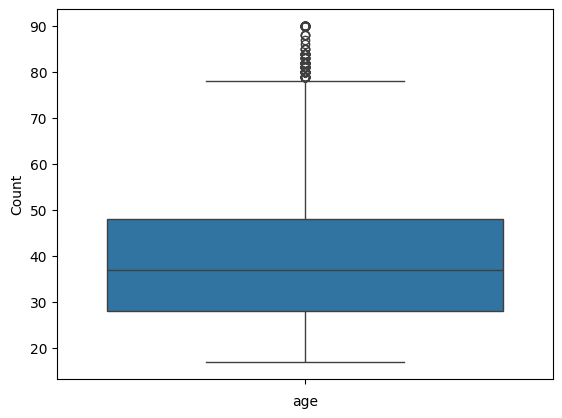

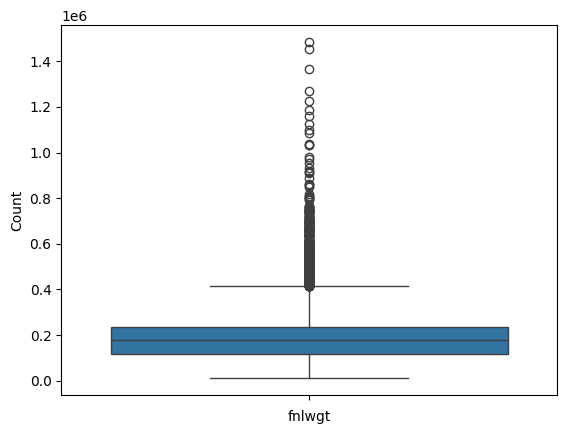

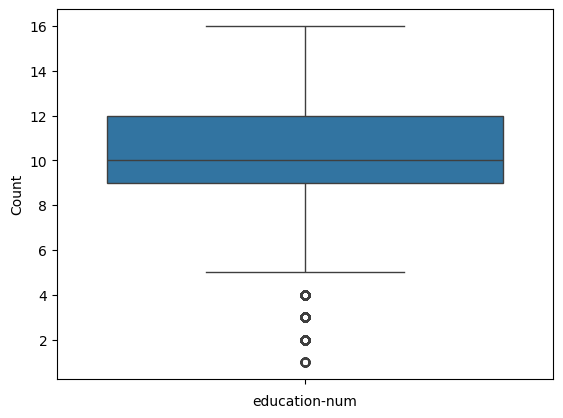

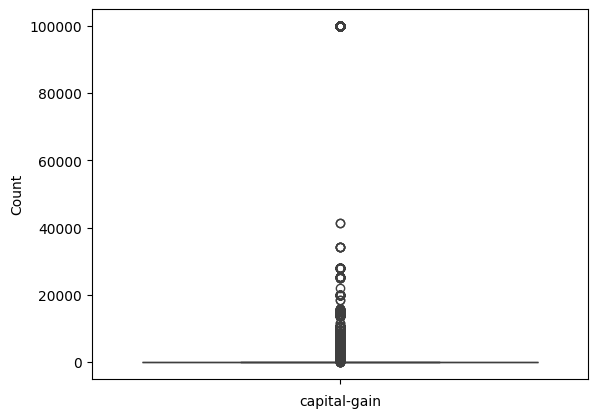

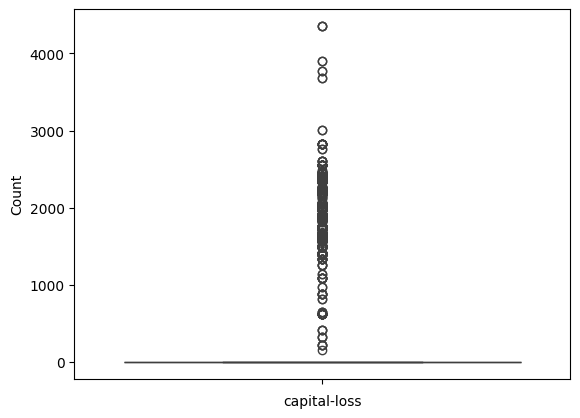

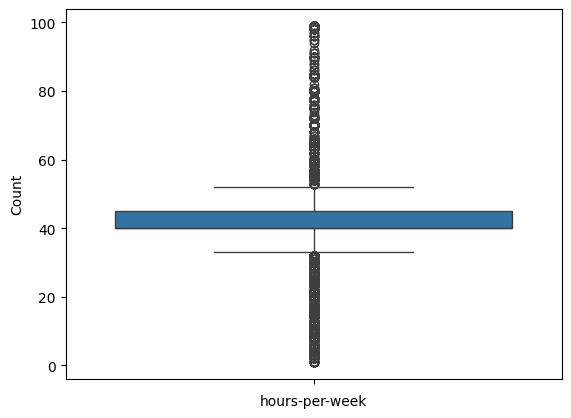

In [122]:
for col in df.columns:
  if df[col].dtypes != 'object':
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [123]:
out_list = ['age','education-num', 'fnlwgt','hours-per-week']
for col in out_list:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  LB = Q1 - 1.5*(IQR)
  UB = Q3 + 1.5*(IQR)

  df = df[(df[col] >= LB) & (df[col] <= UB)]

In [124]:
df.shape

(21926, 15)

### **Label Encoding**

In [125]:
le = LabelEncoder()
for col in df.columns:
  if df[col].dtypes == 'object':
    df[col] = le.fit_transform(df[col])

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21926 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             21926 non-null  int64
 1   workclass       21926 non-null  int64
 2   fnlwgt          21926 non-null  int64
 3   education       21926 non-null  int64
 4   education-num   21926 non-null  int64
 5   marital-status  21926 non-null  int64
 6   occupation      21926 non-null  int64
 7   relationship    21926 non-null  int64
 8   race            21926 non-null  int64
 9   sex             21926 non-null  int64
 10  capital-gain    21926 non-null  int64
 11  capital-loss    21926 non-null  int64
 12  hours-per-week  21926 non-null  int64
 13  native-country  21926 non-null  int64
 14  annual_income   21926 non-null  int64
dtypes: int64(15)
memory usage: 2.7 MB


### **Model Building**

In [127]:
X = df.drop('annual_income', axis=1)
y = df['annual_income']

In [128]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,6,13,4,0,1,4,1,2174,0,40,38
2,38,3,215646,8,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,6,13,2,9,5,2,0,0,0,40,4
5,37,3,284582,9,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,3,310152,11,10,4,10,1,4,1,0,0,40,38
32556,27,3,257302,4,12,2,12,5,4,0,0,0,38,38
32557,40,3,154374,8,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,8,9,6,0,4,4,0,0,0,40,38


In [129]:
y

,annual_income
0,0
2,0
3,0
4,0
5,0
...,...
32555,0
32556,0
32557,1
32558,0


### **Train Test Split**

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

### **Logistic Regression**

In [131]:
model_lr = LogisticRegression()

In [132]:
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
y_pred_lr = model_lr.predict(X_test)

#### **Logistic Regression Accuracy Score**

In [134]:
accuracy_score(y_pred_lr, y_test)*100

77.79297765617875

### **Decision tree**

In [135]:
for i in range(1,9):
  temp_model = DecisionTreeClassifier(max_depth=i)
  temp_model.fit(X_train, y_train)
  temp_y_pred = temp_model.predict(X_test)
  acc = accuracy_score(temp_y_pred, y_test)*100
  print(f'The accuracy score of max depth {i} is {acc}')

The accuracy score of max depth 1 is 73.27861377108982
The accuracy score of max depth 2 is 81.28134974920201
The accuracy score of max depth 3 is 82.71773825809393
The accuracy score of max depth 4 is 83.26493388052896
The accuracy score of max depth 5 is 83.10533515731873
The accuracy score of max depth 6 is 83.69813041495668
The accuracy score of max depth 7 is 83.81212950296397
The accuracy score of max depth 8 is 83.31053351573188


In [136]:
model_dt = DecisionTreeClassifier(max_depth=5)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
acc = accuracy_score(y_pred_dt, y_test)*100

### **Decision Tree Accuracy Score**

In [137]:
print(f'The accuracy score is {acc}')

The accuracy score is 83.08253533971728


### **Random Forest**

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
model_rf = RandomForestClassifier(max_depth=6)

In [140]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [141]:
y_pred_rf = model_rf.predict(X_test)

#### **Random Forest Accuracy Score**

In [142]:
accuracy_score(y_pred_rf, y_test)*100

84.31372549019608